In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from catboost import CatBoostClassifier
import lightgbm as lgb
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
dataset_path = 'data/creditcard.csv'
dataset = pd.read_csv(dataset_path, sep='[,]', engine='python')

In [3]:
df = dataset.copy()
display(df)

,"""Time""","""V1""","""V2""","""V3""","""V4""","""V5""","""V6""","""V7""","""V8""","""V9""",...,"""V21""","""V22""","""V23""","""V24""","""V25""","""V26""","""V27""","""V28""","""Amount""","""Class"""
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,"""0"""
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,"""0"""
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,"""0"""
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,"""0"""
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,"""0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,"""0"""
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,"""0"""
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,"""0"""
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,"""0"""


In [4]:
df.columns = df.columns.str.replace(r'\W', '', regex=True)
df.loc[:, 'Class'] = df.loc[:, 'Class'].str.replace(r'\W', '', regex=True)
df = df.astype({'Class': 'int'})
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# CatBoosting для несбалансированного датасета

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), 
                                                    df['Class'],
                                                    test_size=0.25, 
                                                    random_state=0)

Вручную подберем гиперпараметры для CatBoostClassifier и построим модели с разными метриками

In [50]:
# AUC
params = {'iterations': 200, 'use_best_model': True, 'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.240091
0:	test: 0.9507638	best: 0.9507638 (0)	total: 81.5ms	remaining: 16.2s
50:	test: 0.9795968	best: 0.9796146 (49)	total: 12.3s	remaining: 36s
100:	test: 0.9816619	best: 0.9827684 (81)	total: 29.6s	remaining: 29s
150:	test: 0.9789329	best: 0.9827684 (81)	total: 35.1s	remaining: 11.4s
199:	test: 0.9779268	best: 0.9827684 (81)	total: 51.5s	remaining: 0us

bestTest = 0.9827683755
bestIteration = 81

Shrink model to first 82 iterations.


In [51]:
# Recall
params = {'iterations': 300, 'use_best_model': True, 'eval_metric': 'Recall'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.201268
0:	learn: 0.2204301	test: 0.2833333	best: 0.2833333 (0)	total: 48.6ms	remaining: 14.5s
50:	learn: 0.8494624	test: 0.8000000	best: 0.8000000 (21)	total: 2.75s	remaining: 13.4s
100:	learn: 0.9032258	test: 0.7916667	best: 0.8000000 (21)	total: 5.42s	remaining: 10.7s
150:	learn: 0.9139785	test: 0.8000000	best: 0.8083333 (138)	total: 8.39s	remaining: 8.28s
200:	learn: 0.9301075	test: 0.8083333	best: 0.8083333 (138)	total: 12.4s	remaining: 6.1s
250:	learn: 0.9569892	test: 0.7916667	best: 0.8083333 (138)	total: 15.9s	remaining: 3.11s
299:	learn: 0.9731183	test: 0.7916667	best: 0.8083333 (138)	total: 19.3s	remaining: 0us

bestTest = 0.8083333333
bestIteration = 138

Shrink model to first 139 iterations.


In [52]:
# Precision
params = {'iterations': 400, 'use_best_model': True, 'eval_metric': 'Precision'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.177593
0:	learn: 0.5616438	test: 0.6538462	best: 0.6538462 (0)	total: 63ms	remaining: 25.1s
50:	learn: 0.9814815	test: 0.9333333	best: 0.9333333 (47)	total: 3.39s	remaining: 23.2s
100:	learn: 1.0000000	test: 0.9423077	best: 0.9428571 (70)	total: 6.76s	remaining: 20s
150:	learn: 1.0000000	test: 0.9423077	best: 0.9428571 (70)	total: 10.2s	remaining: 16.7s
200:	learn: 1.0000000	test: 0.9423077	best: 0.9428571 (70)	total: 13.7s	remaining: 13.6s
250:	learn: 1.0000000	test: 0.9423077	best: 0.9428571 (70)	total: 17.2s	remaining: 10.2s
300:	learn: 1.0000000	test: 0.9423077	best: 0.9428571 (70)	total: 20.9s	remaining: 6.86s
350:	learn: 1.0000000	test: 0.9428571	best: 0.9428571 (70)	total: 24.7s	remaining: 3.45s
399:	learn: 1.0000000	test: 0.9428571	best: 0.9428571 (70)	total: 28.9s	remaining: 0us

bestTest = 0.9428571429
bestIteration = 70

Shrink model to first 71 iterations.


Построим гистограмму значимости фичей датасета

In [53]:
# Accuracy
params = {'iterations': 300, 'use_best_model': True, 'eval_metric': 'Accuracy'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.201268
0:	learn: 0.9983427	test: 0.9985394	best: 0.9985394 (0)	total: 65.8ms	remaining: 19.7s
50:	learn: 0.9997191	test: 0.9995506	best: 0.9995646 (26)	total: 3.31s	remaining: 16.2s
100:	learn: 0.9998315	test: 0.9995506	best: 0.9995646 (26)	total: 6.9s	remaining: 13.6s
150:	learn: 0.9998502	test: 0.9995787	best: 0.9995927 (138)	total: 10.5s	remaining: 10.4s
200:	learn: 0.9998783	test: 0.9995927	best: 0.9995927 (138)	total: 13.9s	remaining: 6.85s
250:	learn: 0.9999251	test: 0.9995646	best: 0.9995927 (138)	total: 17.1s	remaining: 3.33s
299:	learn: 0.9999532	test: 0.9995787	best: 0.9995927 (138)	total: 20.5s	remaining: 0us

bestTest = 0.9995927081
bestIteration = 138

Shrink model to first 139 iterations.


In [54]:
cat_pred = model.predict(X_test)
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.94      0.81      0.87       120

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202


<Axes: ylabel='features'>

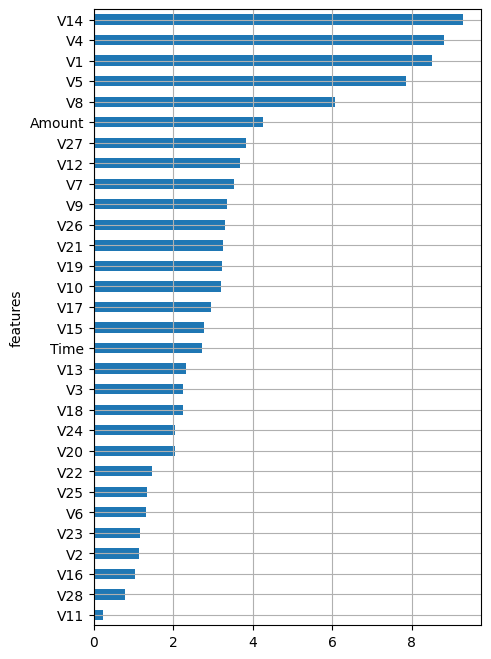

In [35]:
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
fi = pd.DataFrame({'features': feature_names, 'w': model.feature_importances_})
fi.sort_values('w', inplace=True)
fi.set_index('features')['w'].plot(kind='barh', figsize=(5, 8), grid=True)

In [ ]:
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr, tpr, label=f'{title} AUC={auc: .3f}')
    
    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)
    
fig,ax = plt.subplots(1, 1, figsize=(8, 8))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset')

# Прямой отбор фичей

In [36]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [37]:
confusion_matrix(y_test, y_pred)

array([[71076,     6],
       [   23,    97]], dtype=int64)

Визуализируем несбалансированный датасет

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

def plot_data(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, s = 1, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)
        
fig,ax = plt.subplots(figsize=(8, 8))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

Применим Random Undersampling для класса большинства

In [8]:
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)

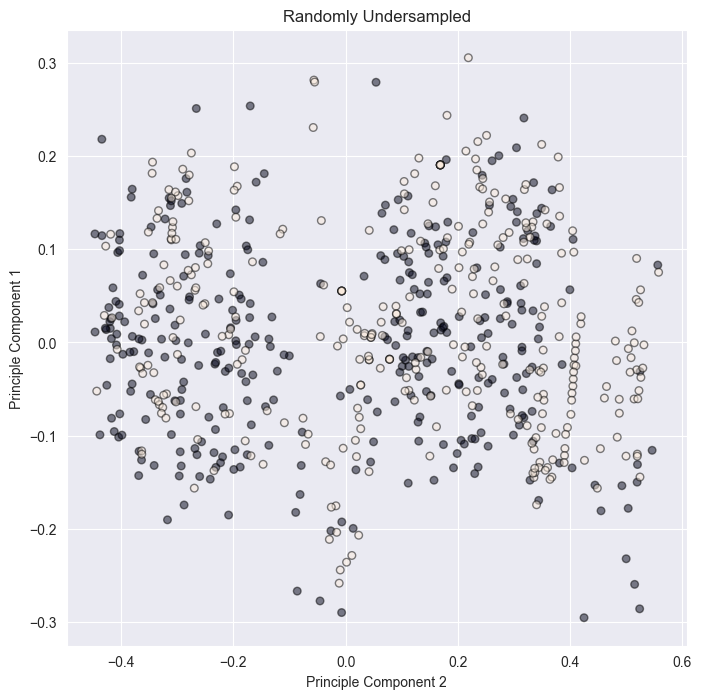

In [9]:
def plot_data(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)
        
fig,ax = plt.subplots(figsize=(8, 8))
plot_data(X_train_rus, y_train_rus, ax, title='Randomly Undersampled')

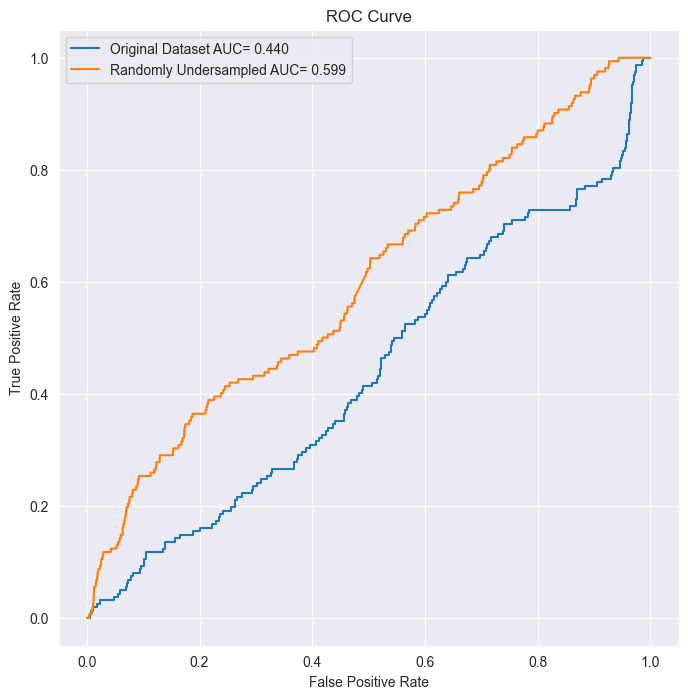

In [10]:
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr, tpr, label=f'{title} AUC={auc: .3f}')
    
    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)
    
fig,ax = plt.subplots(1, 1, figsize=(8, 8))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersampled')

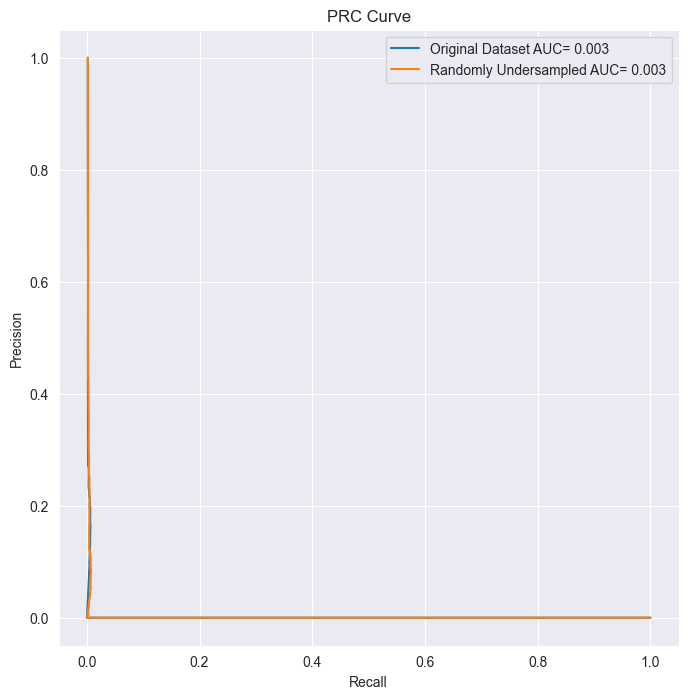

In [11]:
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    auc_prc = metrics.auc(recall, precision)
    ax.plot(precision, recall, label=f'{title} AUC={auc_prc: .3f}')
    
    ax.set_title('PRC Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc=0)
    
fig,ax = plt.subplots(1, 1, figsize=(8, 8))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersampled')

ValueError: Found input variables with inconsistent numbers of samples: [190820, 93987]